In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
A = sns.load_dataset("diamonds")
A

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='y', ylabel='Density'>

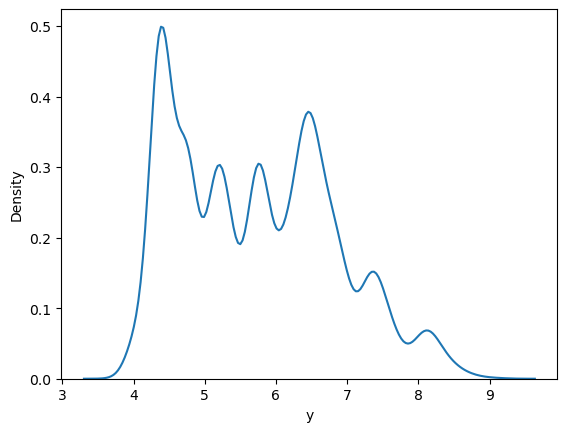

In [17]:
B = A["y"]
B
sns.kdeplot(B)

In [5]:
B.describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

In [6]:
B.median()

5.71

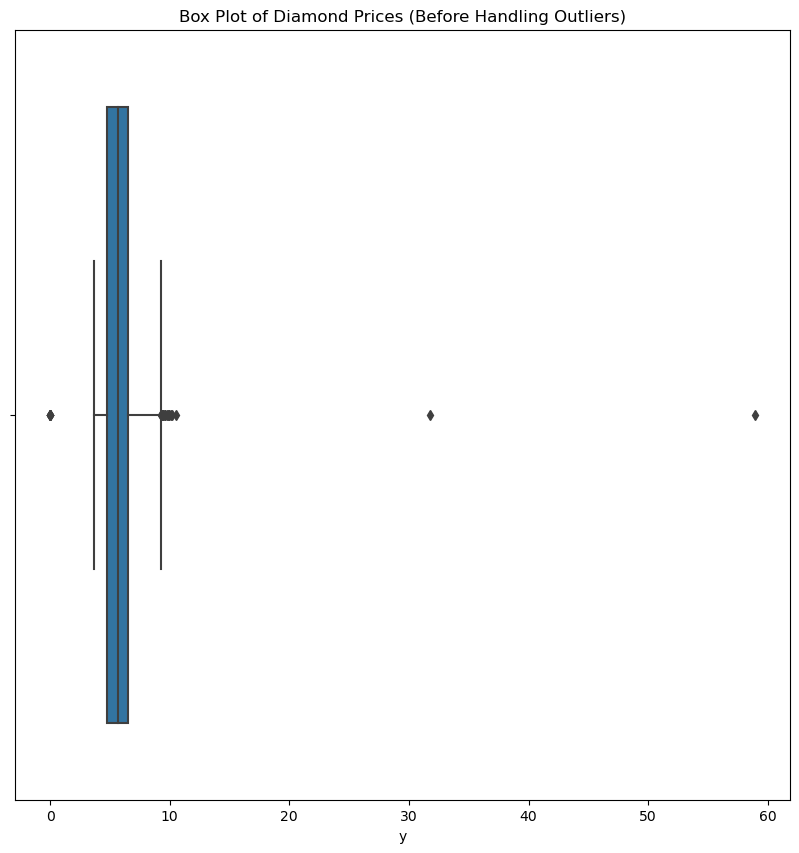

In [7]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=B)
plt.title("Box Plot of Diamond Prices (Before Handling Outliers)")
plt.show()

# outlier removal method 1 median method

In [8]:
Q1 = B.quantile(0.25)
Q3 = B.quantile(0.75)

IQR = Q3-Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR


In [9]:
Outlier = (B<lower_fence)|(B>upper_fence)
B[Outlier] = B.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_1796\2687291251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B[Outlier] = B.median()


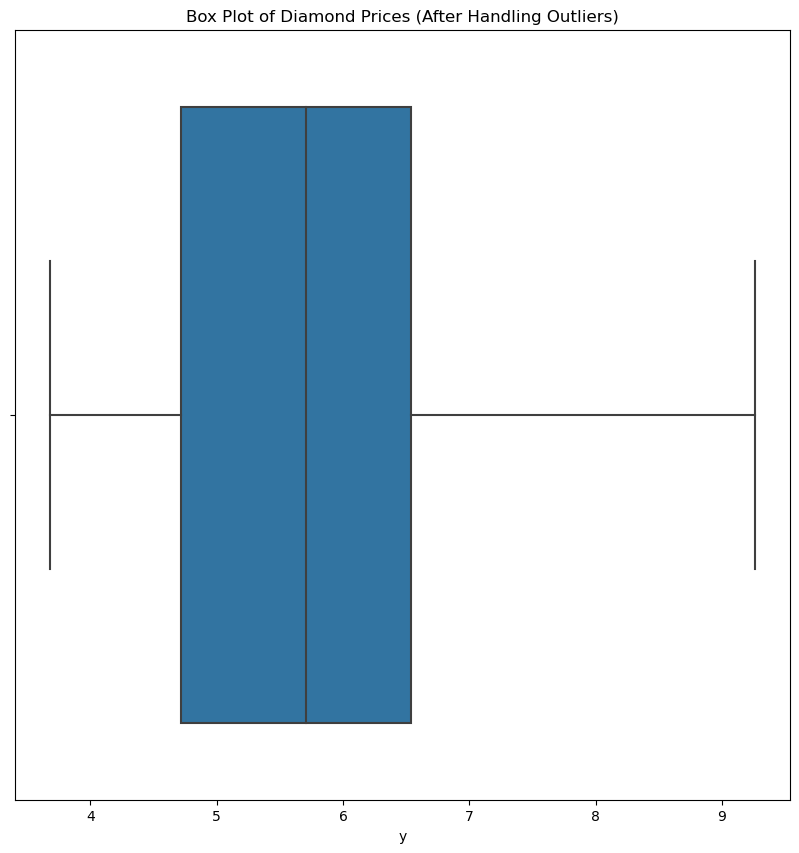

<Axes: xlabel='y', ylabel='Density'>

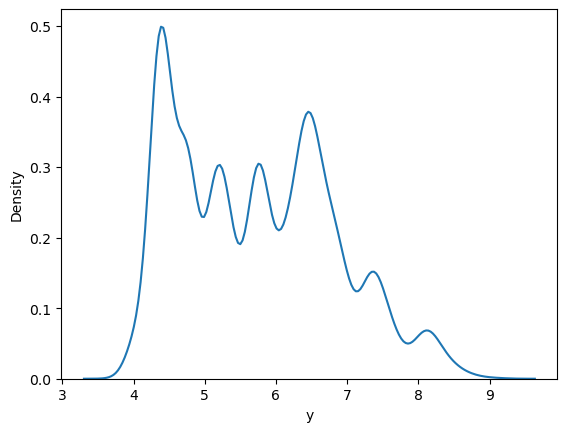

In [18]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=B)
plt.title("Box Plot of Diamond Prices (After Handling Outliers)")
plt.show()
sns.kdeplot(B)

# 2. Outlier removal using log method

In [11]:
RS = np.log10(B)
RS

0        0.599883
1        0.584331
2        0.609594
3        0.626340
4        0.638489
           ...   
53935    0.760422
53936    0.759668
53937    0.754348
53938    0.786751
53939    0.768638
Name: y, Length: 53940, dtype: float64

Log transformation
0        0.599883
1        0.584331
2        0.609594
3        0.626340
4        0.638489
           ...   
53935    0.760422
53936    0.759668
53937    0.754348
53938    0.786751
53939    0.768638
Name: y, Length: 53940, dtype: float64


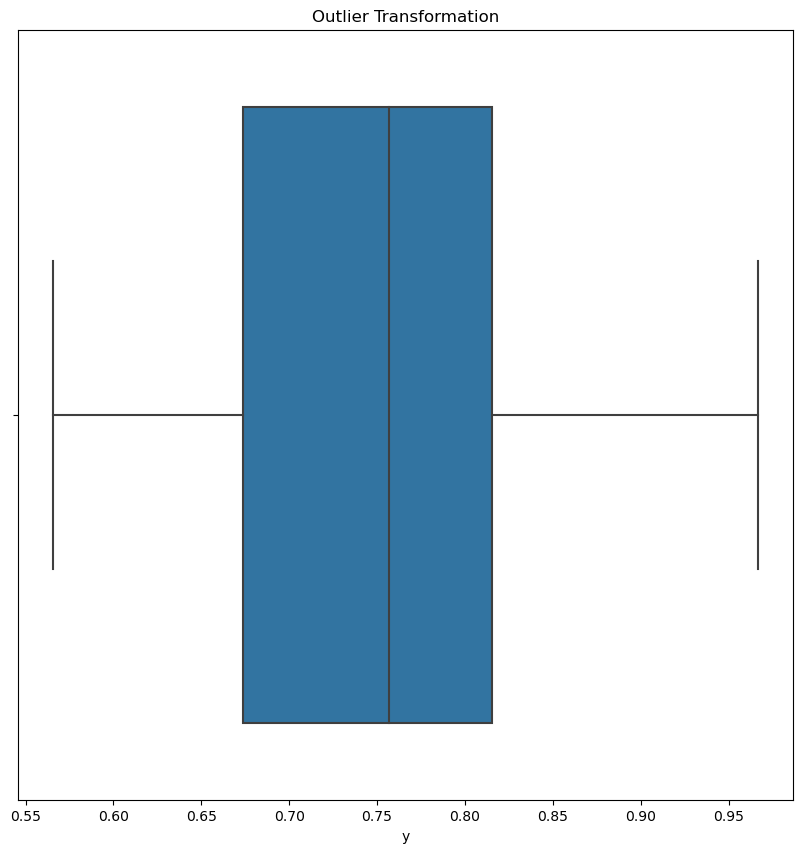

In [13]:
print("Log transformation")
print(RS)

# Plotting the boxplot
plt.figure(figsize=(10, 10))
plt.title("Outlier Transformation")
sns.boxplot(x=RS, data=A,orient="h")

# Show the plot
plt.show()

<Axes: xlabel='y', ylabel='Density'>

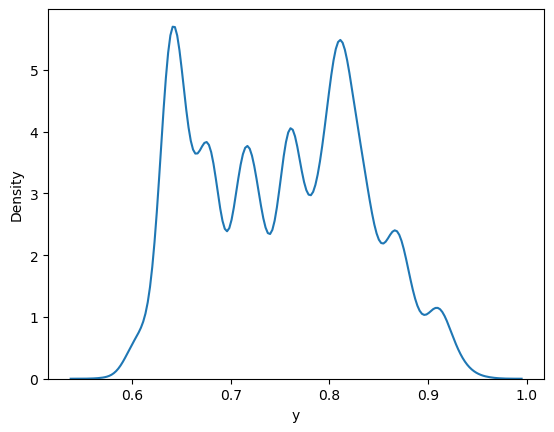

In [16]:
sns.kdeplot(RS)

In [20]:
C = sns.load_dataset("iris")
C

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
D = C["sepal_width"]
D

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

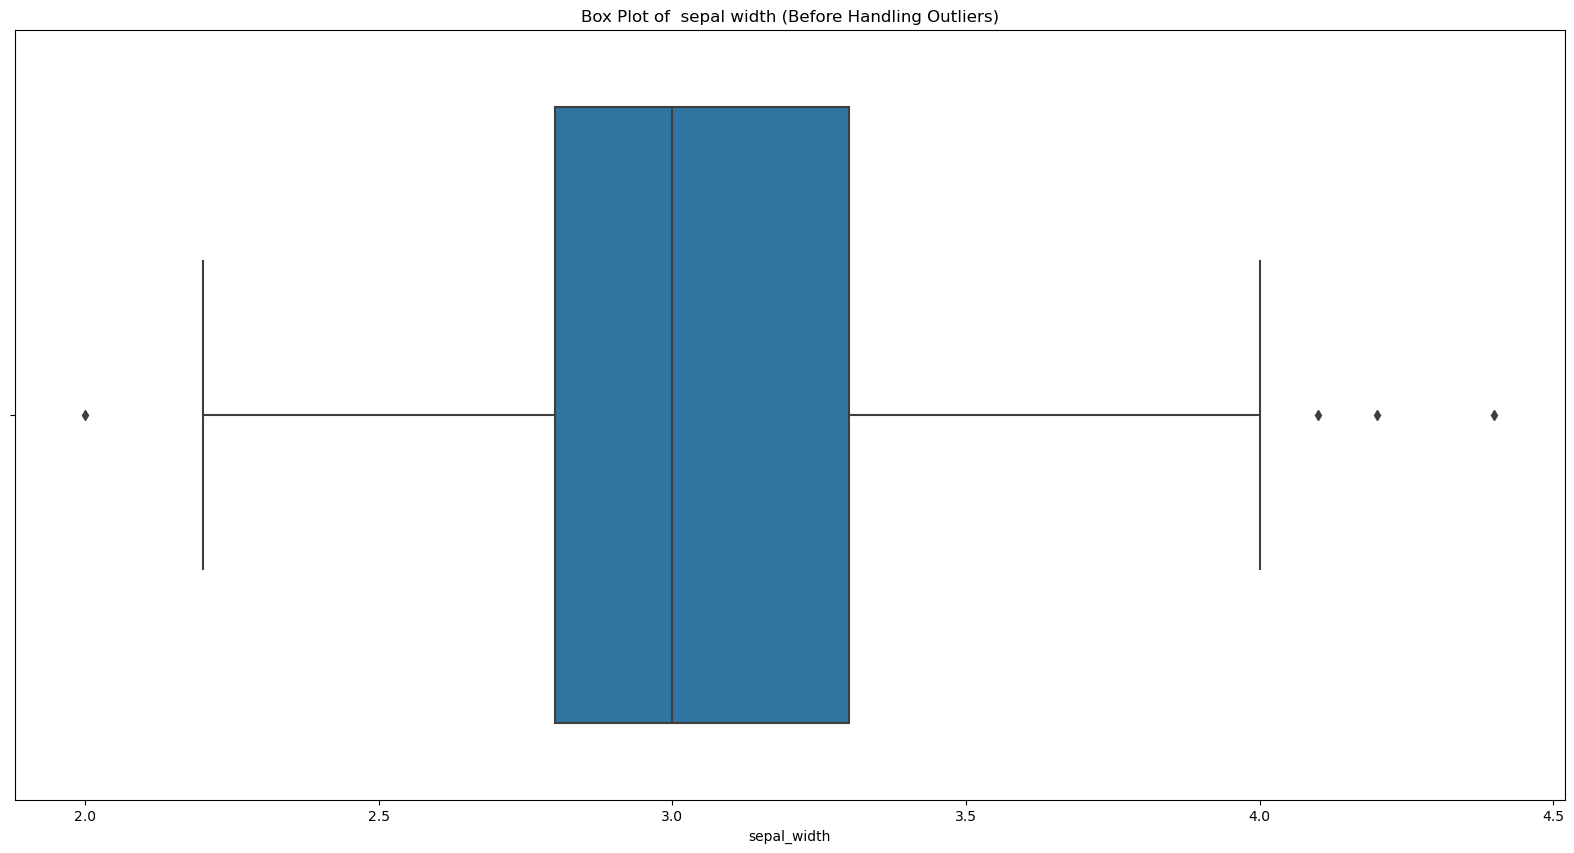

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(x=D)
plt.title("Box Plot of  sepal width (Before Handling Outliers)")
plt.show()

In [30]:
Q1 = D.quantile(0.25)
Q3 = D.quantile(0.75)

In [32]:
IQR = Q3-Q1

In [33]:
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [35]:
Outlier = (D<lower_fence)|(D>upper_fence)
D[Outlier] = D.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_1796\3567937690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D[Outlier] = D.median()


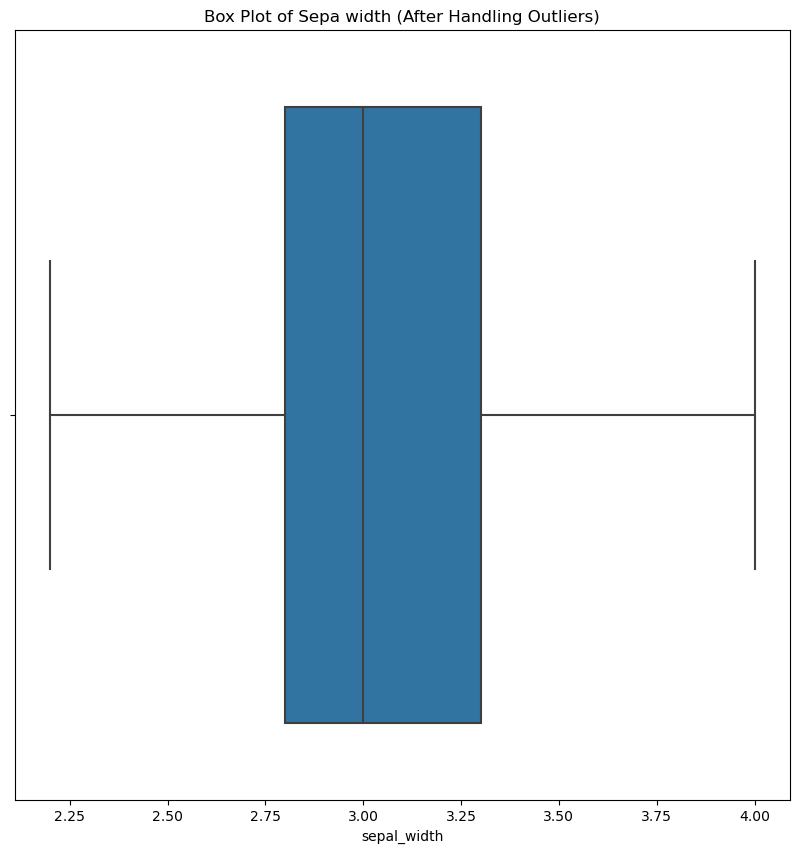

<Axes: xlabel='sepal_width', ylabel='Density'>

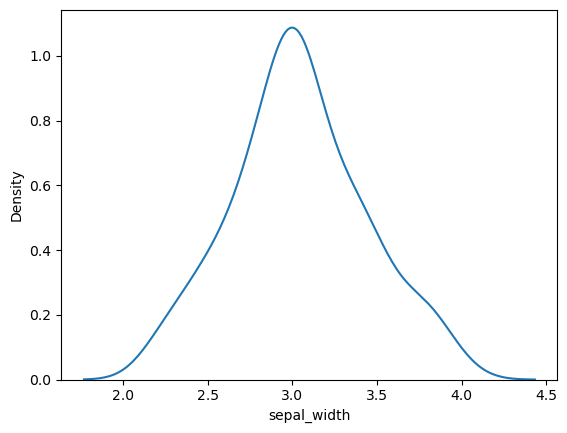

In [36]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=D)
plt.title("Box Plot of Sepa width (After Handling Outliers)")
plt.show()
sns.kdeplot(D)